In [1]:
import numpy as np
import pandas
import pm4py
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import ot
import os
from tqdm import tqdm
import collections
import matplotlib.dates as md
import importlib
import pickle
import random

pandas.set_option('display.max_columns', None)
#pandas.set_option('display.max_rows', None)


import sys
sys.path.append('../../TaskExecutionTimeMining/')
from drbart_parser import *
from event_log_transformer import *

#sys.path.append('../../Evaluation')
sys.path.append('../../Evaluation/')
from PCR_evaluation.drbart_evaluation import *

In [2]:
with open('../transformed_event_logs/PCR_start_end_train.pickle', 'rb') as f:
    test_event_log = pickle.load(f)

#test_event_log['time:timestamp'] = test_event_log['time:timestamp_complete']
test_event_log['case:concept:name'] = test_event_log['case:concept:name'].astype(str)

In [3]:
drbart_model = DRBART(parser_dir = '../../../models/pcr/concept-name_seconds-in-day/',
                     strict_parser=False)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [4]:
known_activities = test_event_log['concept:name'].unique()
known_activities

array(['timeout', 'Wait for plate validation', 'Match patient data',
       'Receive sample state', 'Callback timeout', 'Export to EMS',
       'Export result', 'Send notification'], dtype=object)

In [18]:
def show_pdf(concept_names, seconds_in_days):
    y_grid = np.linspace(0, 20000, 1000)
    ps = drbart_model.proba(y_grid, concept_names, seconds_in_days)
    for j, i in ps:
        plt.plot(y_grid, i, label=str(j))
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xlabel("x")
    plt.ylim(0, 0.01)
    plt.ylabel("y")
    plt.show()

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/PCR/../../TaskExecutionTimeMining/drbart_parser.py:212: RuntimeWarning: divide by zero encountered in log
  lo = np.log(n)


[(['timeout', 28800], array([3.21982592e-07, 3.50907600e-07, 3.86578796e-07, 4.31372871e-07,
       4.89378383e-07, 5.69079744e-07, 6.91158546e-07, 9.10849560e-07,
       1.48159951e-06, 1.69302399e-04, 1.72725131e-04, 1.85285884e-06,
       1.24512137e-06, 8.39767033e-07, 1.16847402e-05, 1.21572878e-04,
       5.48537088e-07, 5.28929069e-07, 5.40311862e-07, 6.08744695e-07,
       8.41893274e-07, 9.34647564e-06, 2.68769761e-06, 2.39341103e-06,
       6.68331408e-07, 4.73969692e-07, 3.85724621e-07, 3.33343027e-07,
       2.97971745e-07, 2.71861878e-07, 2.51690560e-07, 2.35572254e-07,
       2.32391628e-04, 2.25430906e-07, 2.01376592e-07, 2.01071509e-07,
       1.01763814e-06, 2.11874227e-07, 7.43052275e-06, 1.64563408e-07,
       1.58581148e-07, 1.52880022e-07, 1.47420135e-07, 1.42172550e-07,
       1.37115226e-07, 1.32231187e-07, 1.27507213e-07, 1.22932897e-07,
       1.18499937e-07, 1.14201622e-07, 1.10032440e-07, 1.05987781e-07,
       1.02063713e-07, 9.82568209e-08, 9.45640693e-08, 

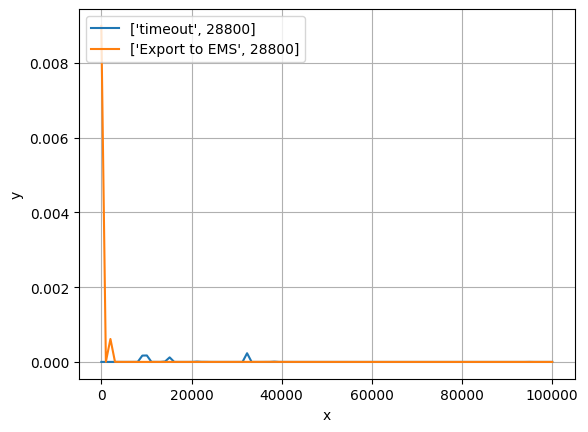

In [6]:
show_pdf([['timeout'], ['Export to EMS']], [[8*3600], [8*3600]])

[(['timeout', 28800], array([3.21982592e-07, 3.22501509e-07, 3.23022440e-07, 3.23545396e-07,
       3.24070388e-07, 3.24597425e-07, 3.25126520e-07, 3.25657683e-07,
       3.26190924e-07, 3.26726256e-07, 3.27263688e-07, 3.27803232e-07,
       3.28344900e-07, 3.28888702e-07, 3.29434651e-07, 3.29982756e-07,
       3.30533030e-07, 3.31085485e-07, 3.31640132e-07, 3.32196982e-07,
       3.32756047e-07, 3.33317340e-07, 3.33880873e-07, 3.34446656e-07,
       3.35014702e-07, 3.35585024e-07, 3.36157634e-07, 3.36732543e-07,
       3.37309765e-07, 3.37889311e-07, 3.38471195e-07, 3.39055428e-07,
       3.39642024e-07, 3.40230996e-07, 3.40822355e-07, 3.41416116e-07,
       3.42012291e-07, 3.42610893e-07, 3.43211936e-07, 3.43815432e-07,
       3.44421396e-07, 3.45029840e-07, 3.45640778e-07, 3.46254225e-07,
       3.46870193e-07, 3.47488696e-07, 3.48109749e-07, 3.48733366e-07,
       3.49359560e-07, 3.49988346e-07, 3.50619738e-07, 3.51253751e-07,
       3.51890399e-07, 3.52529697e-07, 3.53171660e-07, 

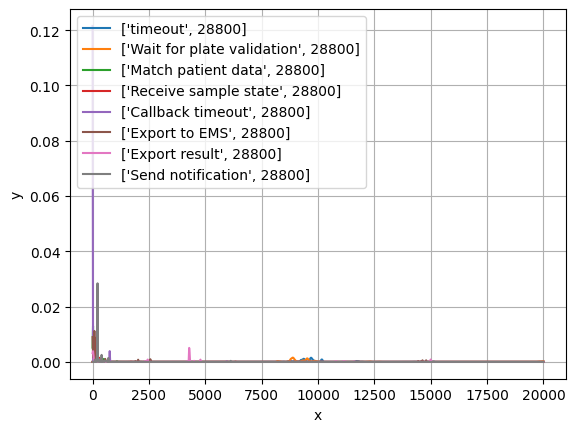

In [16]:
show_pdf([[known_activity] for known_activity in known_activities], [[8*3600] for i in range(len(known_activities))])

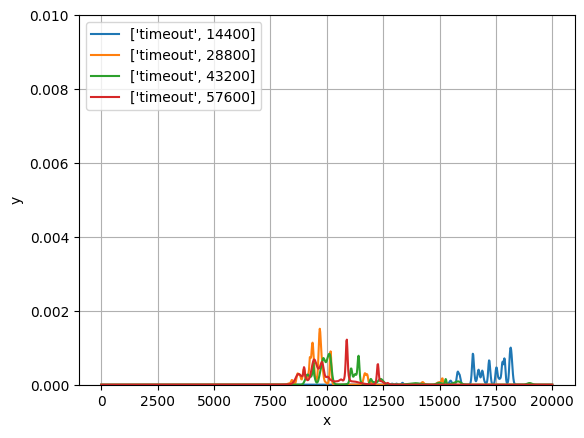

In [19]:
show_pdf([['timeout'] for i in range(4, 20, 4)], [[i*3600] for i in range(4, 20, 4)])

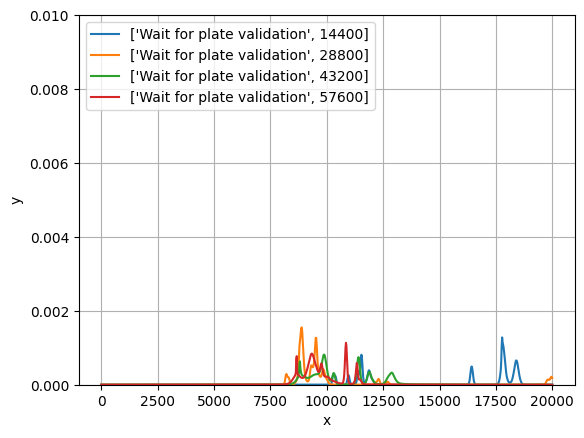

In [20]:
show_pdf([['Wait for plate validation'] for i in range(4, 20, 4)], [[i*3600] for i in range(4, 20, 4)])

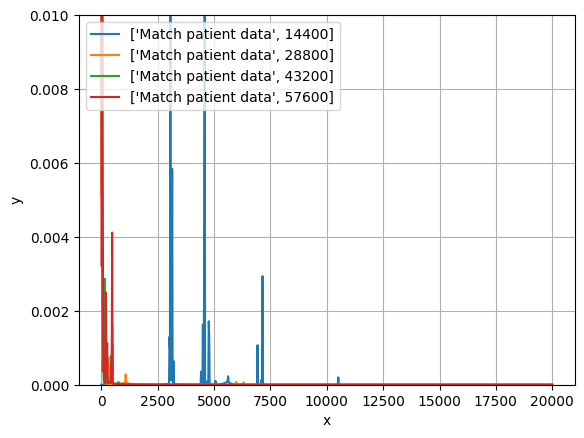

In [21]:
show_pdf([['Match patient data'] for i in range(4, 20, 4)], [[i*3600] for i in range(4, 20, 4)])

In [8]:
list(known_activities)

['timeout',
 'Wait for plate validation',
 'Match patient data',
 'Receive sample state',
 'Callback timeout',
 'Export to EMS',
 'Export result',
 'Send notification']

In [9]:
def proba(x_categorical : list[list], x_continous : list[list]):
    x_rows_decoded = [l1 + l2 for l1, l2 in zip(x_categorical, x_continous)]
    x_encoded_categorical = drbart_model.parser.get_encodings(x_categorical)
    print(x_encoded_categorical)
    x_rows = [k[0] + k[1] for k in zip(x_encoded_categorical, x_continous)]
    print(x_rows)
proba([[known_activity] for known_activity in known_activities], [[8*3600] for i in range(len(known_activities)+1)])

[[1], [2], [3], [4], [5], [6], [7], [8]]
[[1, 28800], [2, 28800], [3, 28800], [4, 28800], [5, 28800], [6, 28800], [7, 28800], [8, 28800]]


In [10]:
proba([['asdf']], [[8*3600]])

[[0]]
[[0, 28800]]


In [11]:
drbart_model.parser.strict

False

In [12]:
# Two lists of lists with the same length
list1 = [[1, 2], [3, 4], [5, 6]]
list2 = [[7, 8], [9, 10], [11, 12]]

# Concatenate the sublists element-wise
result = [sublist1 + sublist2 for sublist1, sublist2 in zip(list1, list2)]

print(result)

[[1, 2, 7, 8], [3, 4, 9, 10], [5, 6, 11, 12]]
